# Feed Forward Neural Network for Classification using Numpy
Python module contained [here](https://github.com/ryan-kp-miller/Machine-Learning-Algorithms/tree/master/NeuralNetwork).

## Importing NN Module and Dependencies

In [2]:
import pandas as pd
import numpy as np
import time
from NeuralNetwork.NeuralNetwork import NeuralNetwork

In [3]:
print(NeuralNetwork().__doc__)


        this class is for training, predicting, and evaluating an L-depth
        Neural Network for binary classification using linear ReLU hidden nodes
        and a linear Sigmoid output node

        inputs:
            layer_dims: list containing the number of neurons for each hidden layer
            alpha: float representing the learning rate of the model
            epochs: int representing the number of training epochs
            init_strategy: string representing the parameter initialization strategy
                           takes the value of "xavier" or "he"
            decay_rate: float representing the decay rate for learning rate decay
            mini_batch_size: int representing the size of each mini-batch
                             if mini_batch_size == num_examples, then performing batch gradient descent
            epsilon: float representing the adjustment value to avoid numerical instability (divide by 0)
            random_state: int for setting the np.rand

## Testing Performance on MNIST Dataset

In [4]:
#testing NeuralNetwork class using MNIST dataset
train = pd.read_csv("../Data/mnist_train.csv",header=0)
test = pd.read_csv("../Data/mnist_test.csv",header=0)
#shaping and preprocessing the data
X_train = train.iloc[:,1:].values
X_train = X_train.astype(np.float16)
X_train = X_train.T / 255
Y_train = pd.get_dummies(train.iloc[:,0]).values.T
X_test = test.iloc[:,1:].values
X_test = X_test.astype(np.float16)
X_test = X_test.T / 255
Y_test = pd.get_dummies(test.iloc[:,0]).values.T

In [5]:
#initializing, training, and evaluating the nn
nn = NeuralNetwork(alpha=0.1,epochs=10,layer_dims=[100,100,50,30,30], lmbda = 0.5,
                   decay_rate=0.3, mini_batch_size=128, init_strategy = "xavier",
                   random_state=0, print_errors=True)

start = time.time()
nn.train(X_train, Y_train)
end = time.time()
print("Self-Made Neural Network Classifier Runtime:",np.round(end-start,6),'seconds')

Shape of Training Data: (784, 60000)
Number of Classes: 10
Number of Layers 7
Layer Dimensions: [784, 100, 100, 50, 30, 30, 10]
Number of Mini-Batches 469
Logloss after iteration 100: 1.027572
Logloss after iteration 200: 0.572389
Logloss after iteration 300: 0.352170
Logloss after iteration 400: 0.226383
Logloss after iteration 500: 0.059448
Logloss after iteration 600: 0.242676
Logloss after iteration 700: 0.115547
Logloss after iteration 800: 0.212553
Logloss after iteration 900: 0.132236
Logloss after iteration 1000: 0.212283
Logloss after iteration 1100: 0.208597
Logloss after iteration 1200: 0.146492
Logloss after iteration 1300: 0.271891
Logloss after iteration 1400: 0.008005
Logloss after iteration 1500: 0.064309
Logloss after iteration 1600: 0.134593
Logloss after iteration 1700: 0.252649
Logloss after iteration 1800: 0.160916
Logloss after iteration 1900: 0.123370
Logloss after iteration 2000: 0.141889
Logloss after iteration 2100: 0.156846
Logloss after iteration 2200: 0.126

Test Accuracy for Neural Network: 96.6 %


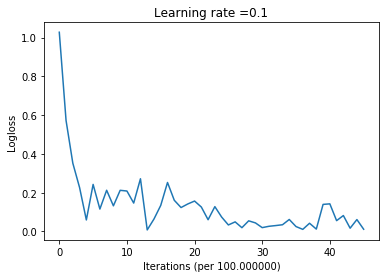

In [6]:
print("Test Accuracy for Neural Network:",np.round(nn.accuracy(X_test,Y_test),3),'%')
nn.plot_cost()

The neural network only took about 18 seconds to get to 96.6% accuracy on the test set, while having 5 hidden layers of at least 30 neurons.